<a href="https://colab.research.google.com/github/brunokobi/Reconhecimento_Padrao/blob/main/classificacao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

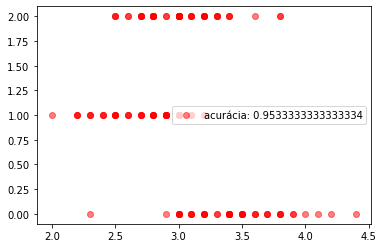

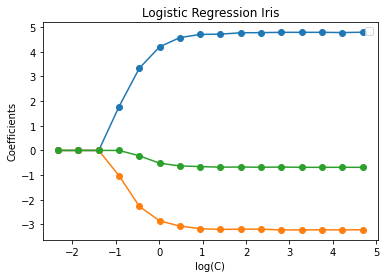

In [28]:
# 1-Carregue uma base de dados de classificação (binária ou multiclasse, mas não multirrótulo) que NÃO esteja nos toy datasets do scikit-learn;
# 2-Treine um modelo da classe LogisticRegression do scikit-learn com toda a base;
# 3-Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado
# 4-Plote 3 gráficos (2D) o MSE em função do atributo intercept_ da classe LogisticRegression. Mantenha os valores do atributo coef_ fixos e varie o
# valor de intercept_ entre intercept_ - delta e intercept_ + delta.
# 4.1-Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico
# do erro da regressão teve. Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão
#diferente do comportamento da função de erro.
# 4.2-O atributo intercept_ da classe LogisticRegression é um array que guarda o valor de interceptação de cada classe do problema da base de dados.
#  Portanto, será necessário fazer 3 gráficos para cada valor do intercept_. Exemplo: problema com 3 classes, 9 gráficos.

import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import l1_min_c
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error

iris = load_iris()
X, y = iris.data, iris.target


X2 = X[:,1:2]


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

cs = l1_min_c(X, y, loss="log") * np.logspace(0, 7, 16)

modelo = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)
modelo.fit(X,y)
ypred = modelo.predict(X)
acuracia = accuracy_score(y, ypred)
mse = mean_squared_error(y, ypred)


plt.plot(X2, ypred, 'ro', label=f"acurácia: {acuracia}", alpha=0.5)
plt.legend()
plt.show()

coefs_ = []
mse_ = []
for c in cs:
    modelo.set_params(C=c)
    modelo.fit(X2,y)
    mse_.append(mean_squared_error(y, ypred))
    coefs_.append(modelo.coef_.ravel().copy())
coefs_ = np.array(coefs_)


plt.plot(np.log10(cs), coefs_, marker="o",)
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Iris")
plt.axis("tight")
plt.legend()
plt.show()

In [29]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

ImportError: ignored